# NAME - ANIBBAN DUTTA
# REG NO. - 19BCB0015

# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import linear_model
from scipy.special import expit

# Importing and loading the dataset

In [2]:
data = pd.read_csv("insurance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      30 non-null     int64
 1   charges  30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [3]:
data.head()

,age,charges
0,18,0
1,28,0
2,33,1
3,32,0
4,31,0


In [4]:
data.describe()

,age,charges
count,30.0000,30.000000
mean,39.0000,0.533333
std,15.5785,0.507416
min,18.0000,0.000000
25%,27.2500,0.000000
50%,33.5000,1.000000
75%,55.7500,1.000000
max,65.0000,1.000000


# Plotting the given data

<AxesSubplot:xlabel='age', ylabel='charges'>

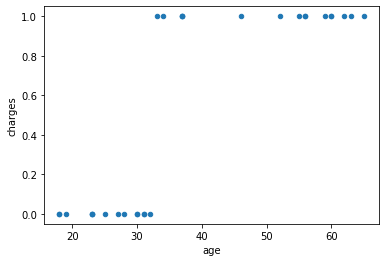

In [5]:
data.plot.scatter(x='age',y='charges')

# Scaling the dataset and splitting X and y into training and testing sets

In [6]:
#Separate Feature and Target Matrices
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

#Split the train and test dataset
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state= 0, train_size = 0.7)

# Applying Logistic Regression

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# Predicting the test set results

In [8]:
y_pred = logreg.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 1 1 1 0 0 1]
[1 0 0 1 1 1 0 0 1]


# Calculating Accuracy

In [9]:
print('Accuracy Score on Test Data:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score on Test Data: 0.8888888888888888


# Visualising the Results

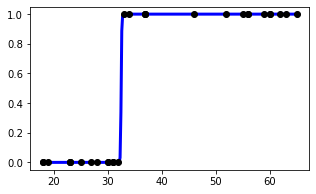

In [10]:
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)
#plot the result
plt.figure(1, figsize=(5, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(18, 65, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='blue', linewidth=3)

# Confusion Matrix

In [11]:
cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

[[4 0]
 [1 4]]


Text(0.5, 15.0, 'Predicted')

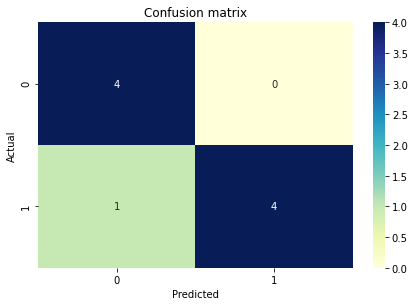

In [12]:
sns.heatmap(pd.DataFrame(cf), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Evaluation Metrics

In [13]:
TP=cf[1,1]
TN=cf[0,0]
FP=cf[0,1]
FN=cf[1,0]

precision=TP/float(TP+FP)
#print(precision)
print('Precision score on confusion matrix:',metrics.precision_score(y_test,y_pred))

recall=TP/float(TP+FN)
#print(recall)
print('Recall score on confusion matrix:',metrics.recall_score(y_test,y_pred))

accuracy=(TP+TN)/float(TP+TN+FP+FN)
#print(acccuracy)
print('Accuracy Score on confusion_matrix: ',metrics.accuracy_score(y_test,y_pred))

Precision score on confusion matrix: 1.0
Recall score on confusion matrix: 0.8
Accuracy Score on confusion_matrix:  0.8888888888888888


In [14]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.80      0.89         5

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9

